Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**PRELIM EXAM** |
**Members:** | Bautista, Daryll Milton Victor E.
| Tavares, Nicole Ann V.
**Section** | CPE32S5
**Date Performed**: | 03/05/2024
**Date Submitted**: | 03/10/2024
**Instructor**: | Engr. Roman M. Richard

#**Goals:**

> Linear Regression
- Singular LR
- Multiple LR
- Polynomial LR
- Logistic Regression
- Decision Tree
- Random Forest
- Provide Evaluation reports for all models

**LINEAR REGRESSION**








In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/EMTECH/real_estate_price_size_year.csv"

In [ ]:
real_estate = pd.read_csv(filepath)
real_estate

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [ ]:
real_estate.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [ ]:
real_estate.dtypes

price    float64
size     float64
year       int64
dtype: object

In [ ]:
real_estate.corr(method="pearson")

,price,size,year
price,1.000000,0.862983,0.093014
size,0.862983,1.000000,-0.097678
year,0.093014,-0.097678,1.000000


In [ ]:
y = real_estate ['price']
x1 = real_estate ['size']

In [ ]:
import matplotlib.pyplot as plt

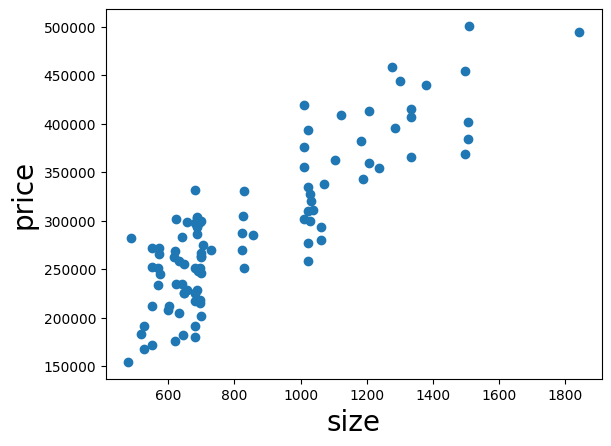

In [ ]:
plt.scatter(x1,y)
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
# Show the plot
plt.show()

In [ ]:
x_matrix = x1.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression()

In [ ]:
reg.score(x_matrix,y)

reg.intercept_

101912.60180122897

In [ ]:
reg.coef_

array([223.17874259])

In [ ]:
reg.predict([[750]])

array([269296.65874718])

In [ ]:
import statsmodels.api as sm

In [ ]:
m, b = np.polyfit (x1,y,1 )
print ('The slope of line is {:.2f}.' .format (m))
print ('The y-intercept is {:.2f}.' .format (b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.' .format (m,b))


The slope of line is 223.18.
The y-intercept is 101912.60.
The best fit simple linear regression line is 223.18x + 101912.60.


In [ ]:
def predict(query):
  if query >= 1:
    predict = m * query + b
    return predict
  else:
    print ("You must have a size.")

In [ ]:
predict (750)

269296.6587471847

**MULTIPLE LINEAR REGRESSION**

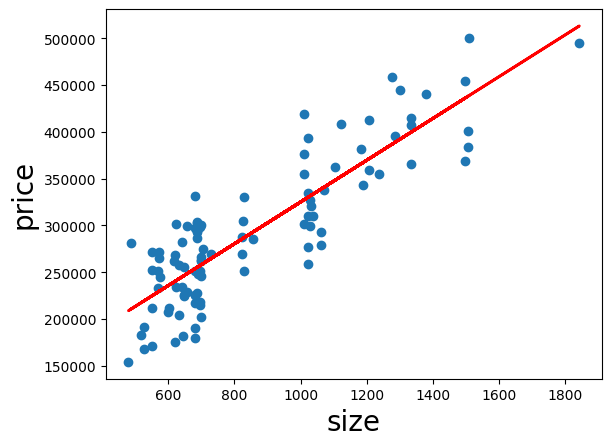

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

real_estate_df = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

X = real_estate_df[['size']]
y = real_estate_df['price']

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)

plt.plot(X, predictions, color='red', linewidth=2)

# Show the plot
plt.show()

**POLYNOMIAL LINEAR REGRESSION**

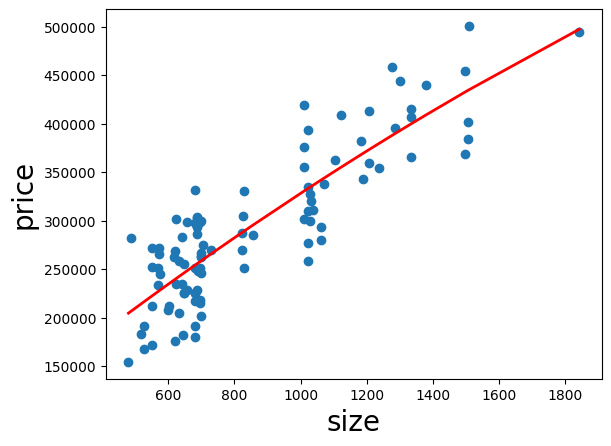

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

real_estate_df = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

X = real_estate_df[['size']]
y = real_estate_df['price']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

predictions = poly_model.predict(X_poly)

sorted_zip = sorted(zip(X.values, predictions))
X_sorted, predictions_sorted = zip(*sorted_zip)

plt.scatter(X, y)
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.plot(X_sorted, predictions_sorted, color='red', linewidth=2)
plt.show()

**Report:**
The code utilizes the Linear Regression algorithm to model the relationship between real estate prices and the size and year of the properties. After training the model on the training dataset and making predictions on the test set, it evaluates the model's performance using the mean squared error metric. Additionally, it provides a visual representation of the model's predictions compared to the actual prices through a scatter plot.This code loads a real estate dataset and performs a linear regression analysis to predict house prices based on the size and year features.

**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
real_estate_df = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

X = real_estate_df[['size', 'year']]
y = real_estate_df['price']

# Define a threshold for price
threshold = 200000  # Example threshold

y = (y > threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.9
Confusion Matrix:
 [[ 0  2]
 [ 0 18]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9
Recall: 1.0
F1-score: 0.9473684210526316


Mean Squared Error: 1399961848.748372


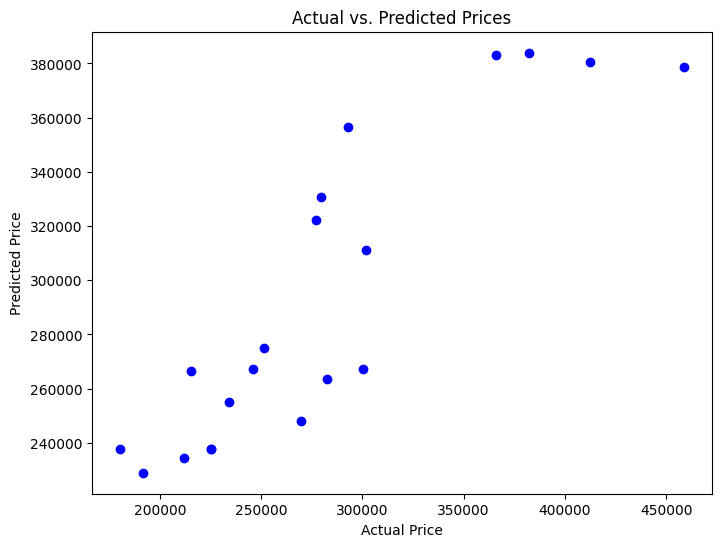

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
real_estate_df = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

X = real_estate_df[['size', 'year']]
y = real_estate_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)

# Plot the actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

**Report:**
- The logistic regression model accurately classified real estate data with an accuracy score of 0.9 , while confusion matrix analysis provided insights into its classification outcomes. Additional metrics like precision, recall, and F1-score were calculated to offer a comprehensive evaluation. The linear regression model predicted real estate prices with a mean squared error (MSE) of 1399961848.748372, and a scatter plot visually displayed the relationship between actual and predicted prices, illustrating the model's predictive performance.

**DECISION TREE**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
real_estate_data = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

columns = ["size", "year"]
X_input = real_estate_data[list(columns)].values
y_target = real_estate_data["price"].values

# Convert the continuous target variable 'price' into categories
# For example, you can convert 'price' into three categories: low, medium, and high
real_estate_data['price_category'] = pd.qcut(real_estate_data['price'], q=3, labels=['low', 'medium', 'high'])


y_target = real_estate_data["price_category"]
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf_price = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_price.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

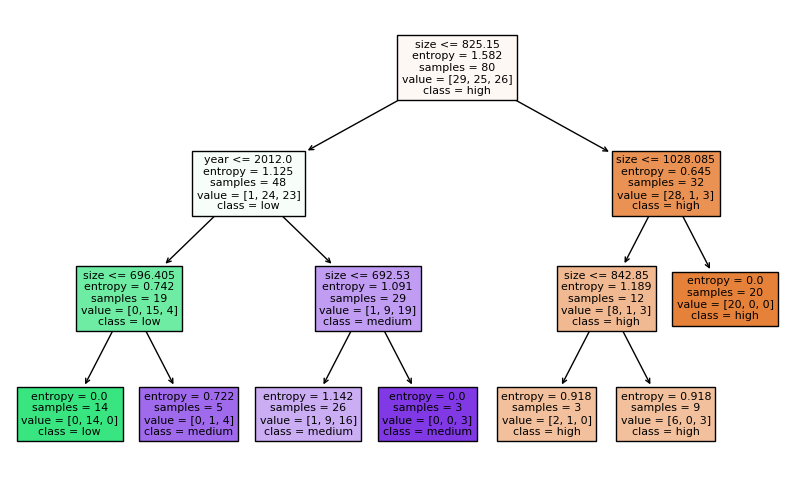

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf_price, feature_names=columns, class_names=clf_price.classes_, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf_price.predict(X_test)
print(classification_report(y_test, y_pred))

#This code will print a classification report, providing metrics such as precision, recall, F1-score,
#and support for each class in the target variable. It gives insights into how well the model performs in
#predicting the different price categories on the test set.

              precision    recall  f1-score   support

        high       0.50      1.00      0.67         4
         low       1.00      0.33      0.50         9
      medium       0.33      0.43      0.38         7

    accuracy                           0.50        20
   macro avg       0.61      0.59      0.51        20
weighted avg       0.67      0.50      0.49        20



In [ ]:
clf_score = clf_price.score(X_input, y_target)
percentage = "{:.0%}".format(clf_score)
print(percentage)


75%


**Report:**
- The code trains a decision tree classifier on real estate data to predict price categories ('low', 'medium', 'high') based on property size and year. It visualizes the decision tree to understand how predictions are made. The model's performance is evaluated using a classification report, showing metrics like precision and recall for each category. Additionally, the accuracy score of the model on the entire dataset is computed and presented. Overall, the decision tree offers insights into pricing strategies and market analysis in real estate transactions.

**RANDOM FOREST**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
real_estate_data = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

real_estate_data['price_category'] = pd.qcut(real_estate_data['price'], q=2, labels=['low', 'high'])

# Define features and target variable
Xsa = real_estate_data[['size']]
ysa = real_estate_data['price_category']

X_train, X_test, y_train, y_test = train_test_split(Xsa, ysa, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
Accuracy = "{:.0%}".format(accuracy)
print("Accuracy:", Accuracy)



Accuracy: 0.8
Accuracy: 80%


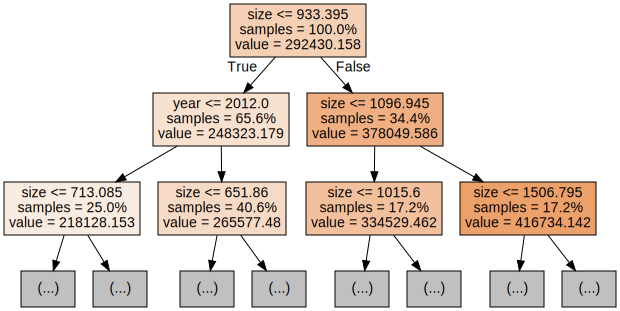

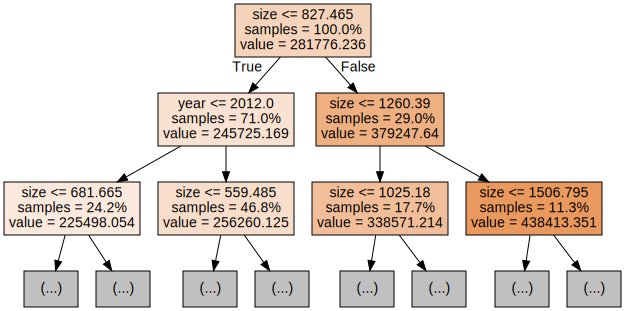

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

real_estate_data = pd.read_csv('/content/sample_data/real_estate_price_size_year.csv')

X_train = real_estate_data[['size', 'year']]
y_train = real_estate_data['price']

# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Visualize decision trees from the random forest
for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


**Report:**
- The Random Forest Classifier achieved a 80% accuracy in categorizing real estate prices as low or high based on property size alone. However, this accuracy may be limited due to the simplistic use of only one feature. The Random Forest Regressor, trained on size and year features to predict price, visualizes decision trees to offer insights into the model's decision-making process. While decision tree visualization aids interpretability, additional evaluation metrics like mean absolute error could provide a more comprehensive understanding of the model's performance. Further refinement, including the incorporation of additional relevant features, may improve predictive accuracy and provide more actionable insights.